In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
data = pd.read_csv("regional_inventories.csv") 

In [4]:
walls = np.unique(data.walls)

In [5]:
roofs = np.unique(data.roof)

In [6]:
roofs

array(['Light material (cogon,nipa,anahaw)',
       'Mixed but predominantly light materials',
       'Mixed but predominantly salvaged materials',
       'Mixed but predominantly strong materials', 'Not Applicable',
       'Salvaged/makeshift materials',
       'Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos)'],
      dtype=object)

In [7]:
regions = np.unique(data.region)

In [8]:
regions

array(['ARMM', 'CAR', 'I - Ilocos', 'II - Cagayan Valley',
       'III - Central Luzon', 'IVA - CALABARZON', 'IVB - MIMAROPA',
       'IX - Zamboanga Peninsula', 'NCR', 'V - Bicol',
       'VI - Western Visayas', 'VII - Central Visayas',
       'VIII - Eastern Visayas', 'X - Northern Mindanao', 'XI - Davao',
       'XII - SOCCSKSARGEN', 'XIII - Caraga'], dtype=object)

In [9]:
# Calculate total population in each region
pop_total = {}
for region in regions:
    pop_total[region] = np.sum(data.loc[(data['region'] == region)].population)
    

In [10]:
# Create grid of populations in different types of buildings
pop_per_type = {}
for region in regions:
    pop_per_type[region] = np.zeros([7,7])
    for i in range(len(roofs)):
        roof = roofs[i]
        for j in range(len(walls)):
            wall = walls[j]
            try:
                pop_per_type[region][i,j] = float(data.loc[(data['region'] == region) & (data['walls'] == wall) & (data['roof'] == roof)].population)
            except:
                pass

[]

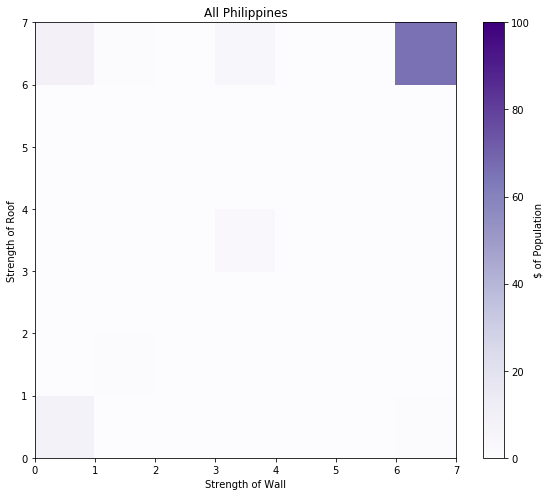

In [11]:
# All Philippines % of Population in Different Type Structures
plt.figure(figsize=(8,7))

allphi_pop_per_type = np.zeros([7,7])
allphi_pop_total = 0
for region in regions:
    allphi_pop_total += pop_total[region]
    allphi_pop_per_type += pop_per_type[region]
plt.pcolormesh(allphi_pop_per_type/allphi_pop_total*100,cmap=plt.cm.Purples)
cbar = plt.colorbar()
plt.clim(0,100)
plt.title('All Philippines')
plt.xlabel('Strength of Wall')
plt.ylabel('Strength of Roof')
cbar.set_label('$ of Population')

plt.tight_layout()
plt.plot()

[]

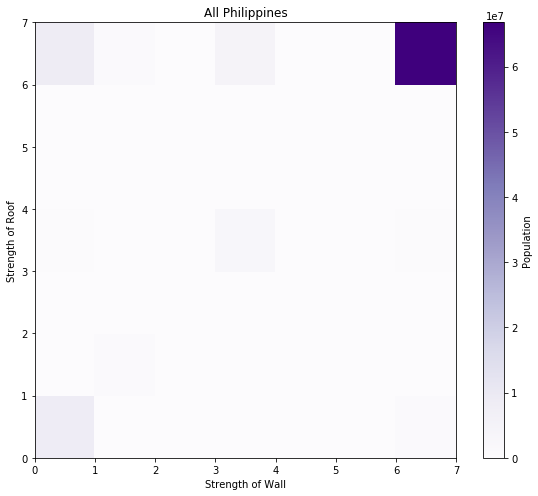

In [12]:
# All Philippines Population in Different Type Structures
plt.figure(figsize=(8,7))

total_pop_per_type = np.zeros([7,7])
for region in regions:
    total_pop_per_type = total_pop_per_type + pop_per_type[region]
plt.pcolormesh(total_pop_per_type,cmap=plt.cm.Purples)
cbar = plt.colorbar()
plt.title('All Philippines')
plt.xlabel('Strength of Wall')
plt.ylabel('Strength of Roof')
cbar.set_label('Population')

plt.tight_layout()
plt.plot()

[]

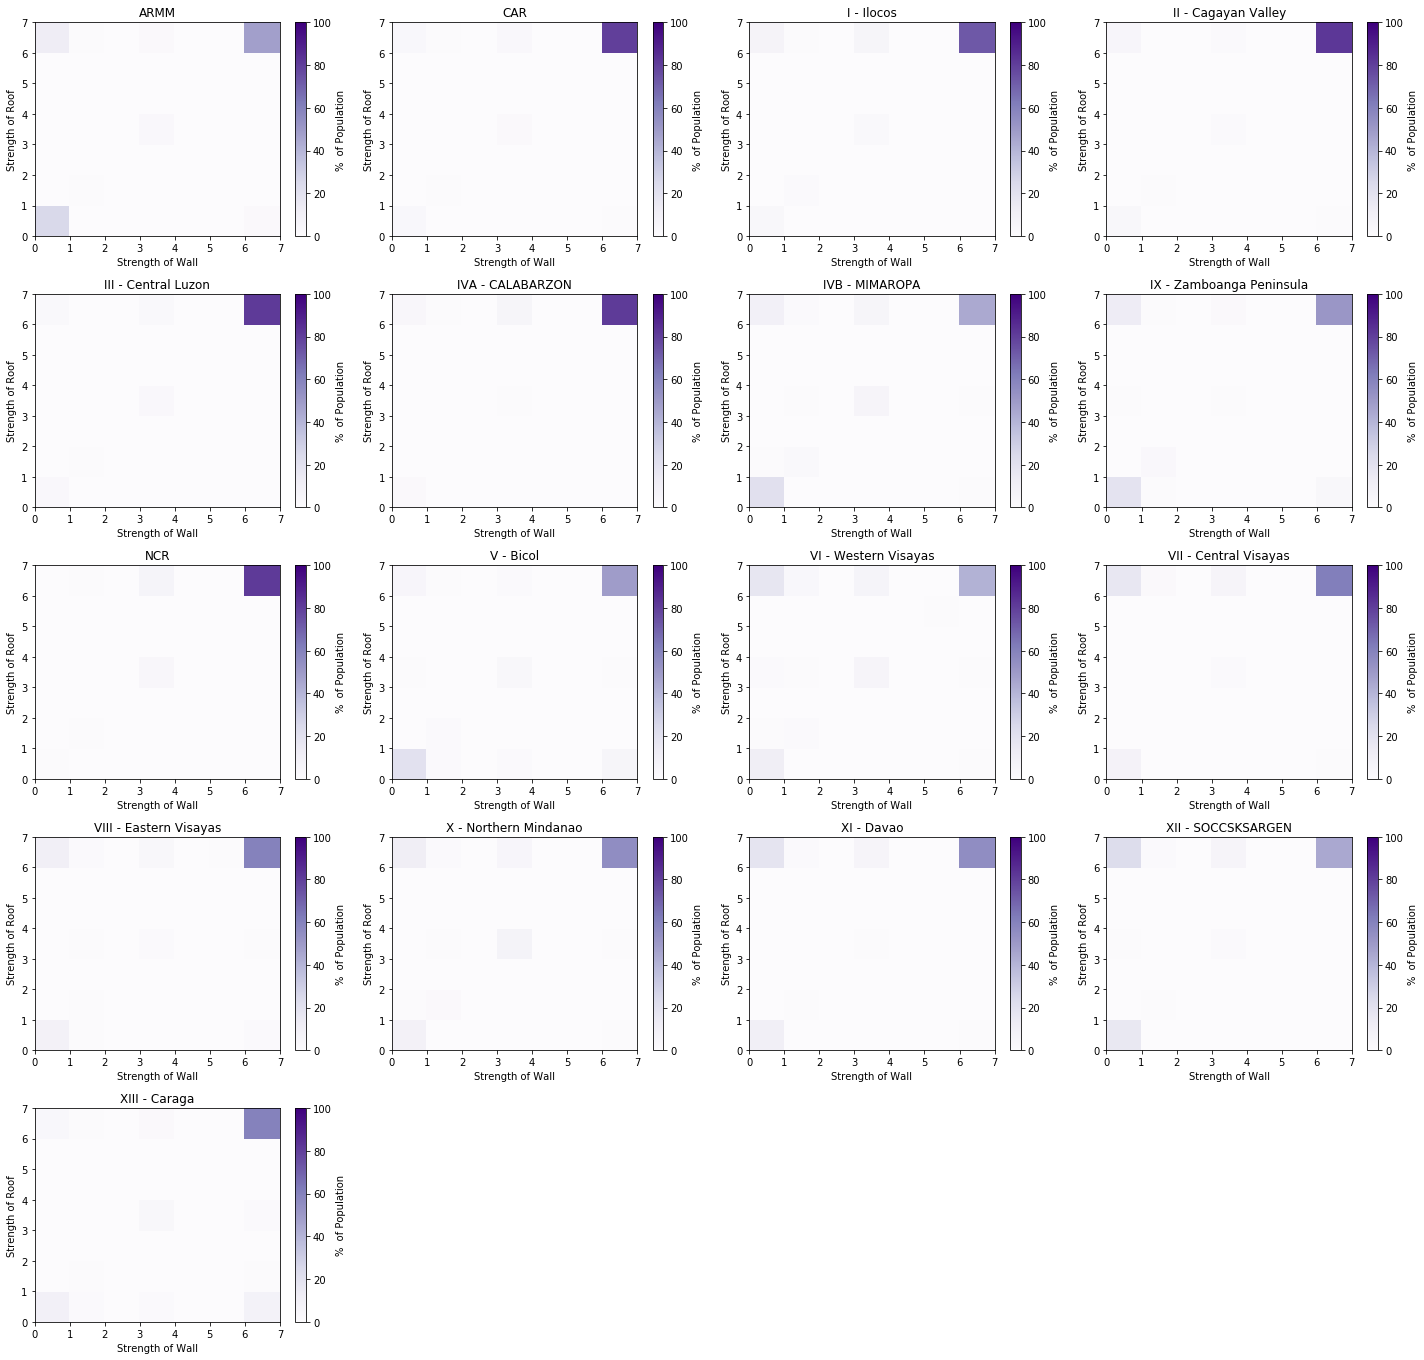

In [13]:
# Plot of Percent of Population in Different Type Structures
plt.figure(figsize=(20,19))

for i in range(len(regions)):
    plt.subplot(5,4,i+1)
    region = regions[i]
    plt.pcolormesh(pop_per_type[region]/pop_total[region]*100,cmap=plt.cm.Purples)
    cbar = plt.colorbar()
    plt.clim(0,100)
    plt.title(region)
    plt.xlabel('Strength of Wall')
    plt.ylabel('Strength of Roof')
    cbar.set_label('%  of Population')

plt.tight_layout()
plt.plot()

[]

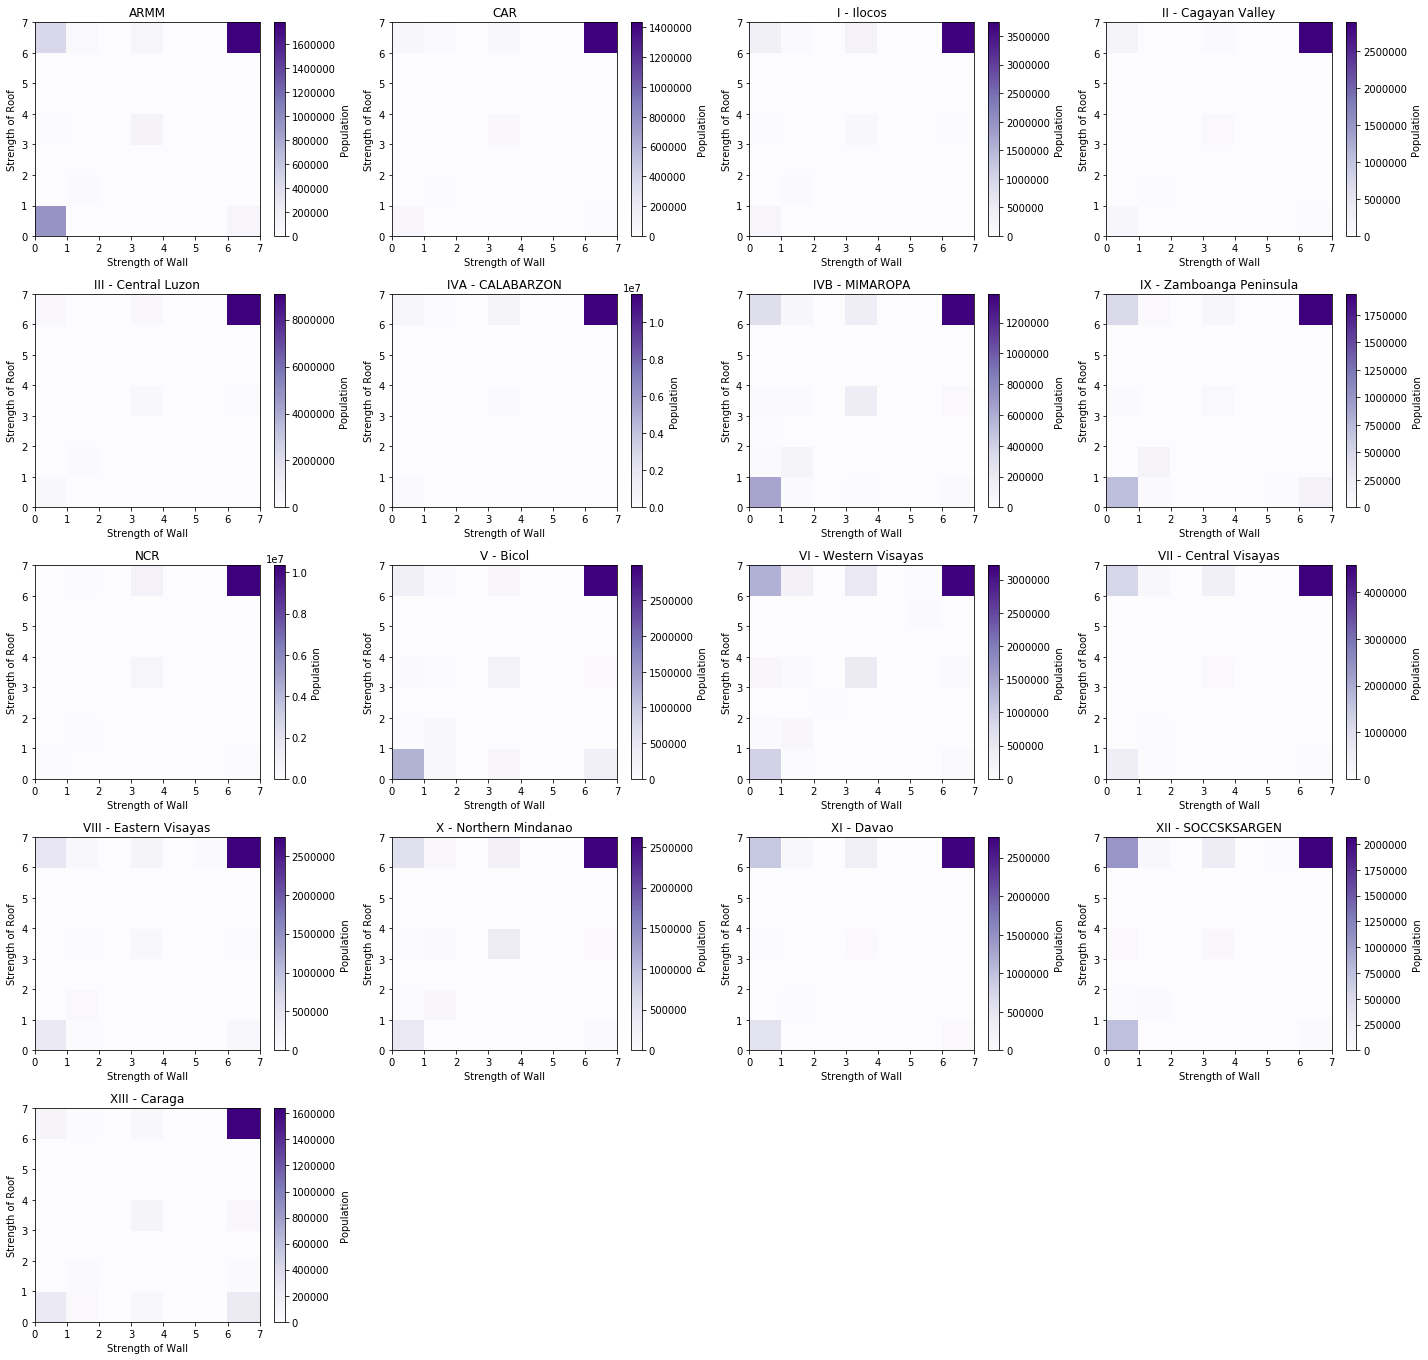

In [14]:
# Plot of Population in Different Type Structures
plt.figure(figsize=(20,19))

for i in range(len(regions)):
    plt.subplot(5,4,i+1)
    r = regions[i]
    plt.pcolormesh(pop_per_type[r],cmap=plt.cm.Purples)
    cbar = plt.colorbar()
    plt.title(r)
    plt.xlabel('Strength of Wall')
    plt.ylabel('Strength of Roof')
    cbar.set_label('Population')

plt.tight_layout()
plt.plot()

[]

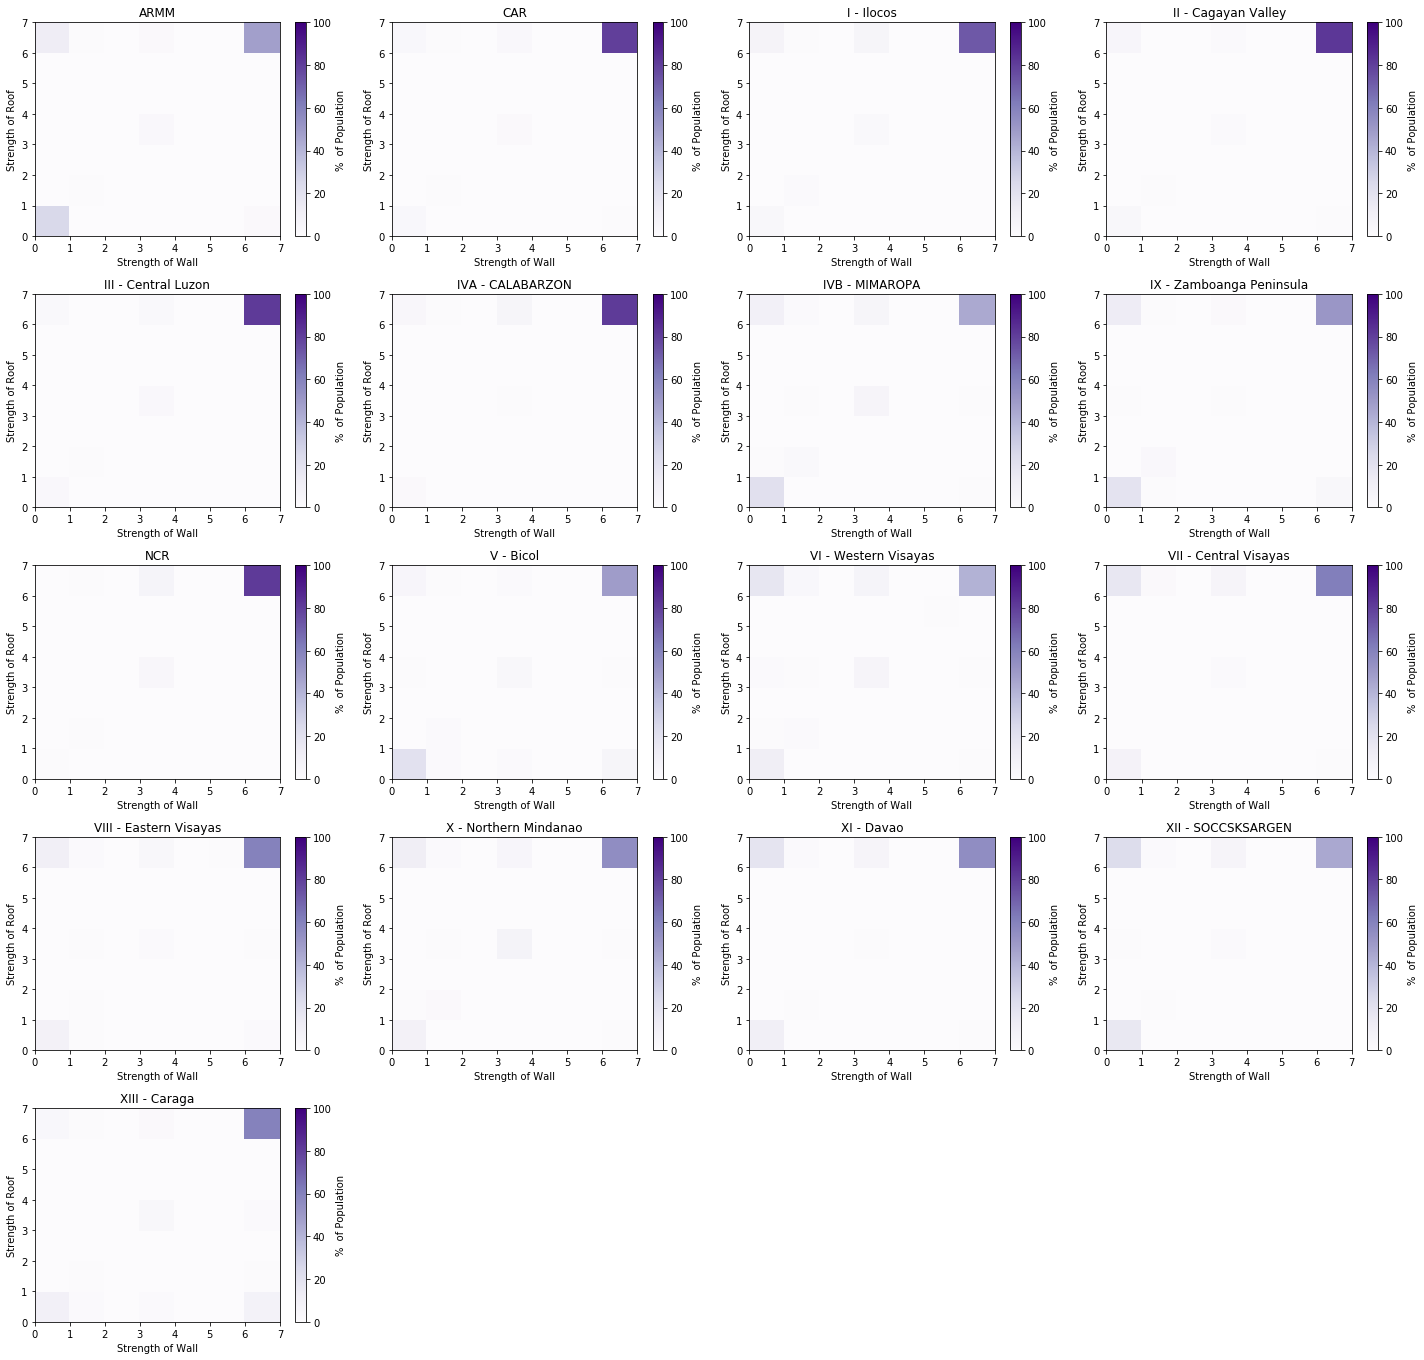

In [15]:
# Bar Plot of Percent of Population in Different Type Structures
plt.figure(figsize=(20,19))

for i in range(len(regions)):
    plt.subplot(5,4,i+1)
    region = regions[i]
    plt.pcolormesh(pop_per_type[region]/pop_total[region]*100,cmap=plt.cm.Purples)
    cbar = plt.colorbar()
    plt.clim(0,100)
    plt.title(region)
    plt.xlabel('Strength of Wall')
    plt.ylabel('Strength of Roof')
    cbar.set_label('%  of Population')

plt.tight_layout()
plt.plot()

In [16]:
# Percents of different roof types
roof_percent = {}
for i in range(len(regions)):
    reg = regions[i]
    roof_percent[reg] = np.sum(pop_per_type[reg]/pop_total[reg],axis=1)
roof_percent['all_phi']= np.sum(allphi_pop_per_type/allphi_pop_total,axis=1)

In [17]:
regions

array(['ARMM', 'CAR', 'I - Ilocos', 'II - Cagayan Valley',
       'III - Central Luzon', 'IVA - CALABARZON', 'IVB - MIMAROPA',
       'IX - Zamboanga Peninsula', 'NCR', 'V - Bicol',
       'VI - Western Visayas', 'VII - Central Visayas',
       'VIII - Eastern Visayas', 'X - Northern Mindanao', 'XI - Davao',
       'XII - SOCCSKSARGEN', 'XIII - Caraga'], dtype=object)

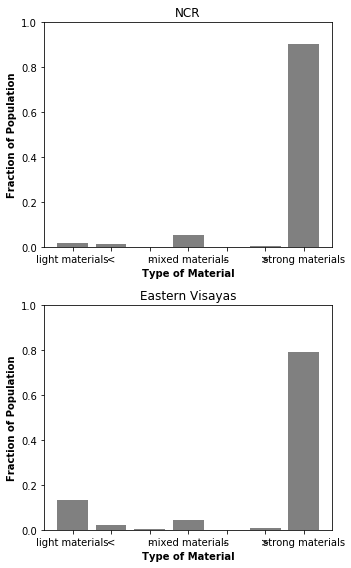

In [18]:
plt.figure(figsize=(5,8))

roof_labels = np.array(['light materials','<',' -','mixed materials','- ','>','strong materials'])

plt.subplot(211)
plt.bar(roof_labels,roof_percent['NCR'],color='0.5')
plt.xlabel('Type of Material',weight='bold')
plt.ylabel('Fraction of Population',weight='bold')
plt.title('NCR')
plt.ylim([0,1])

plt.subplot(212)
plt.bar(roof_labels,roof_percent['VIII - Eastern Visayas'],color='0.5')
plt.xlabel('Type of Material',weight='bold')
plt.ylabel('Fraction of Population',weight='bold')
plt.title('Eastern Visayas')
plt.ylim([0,1])

plt.tight_layout()

In [25]:
roof_percent

{'ARMM': array([0.28629579, 0.01325323, 0.00107072, 0.04461487, 0.0006574 ,
        0.00351351, 0.65059447]),
 'CAR': array([4.83937428e-02, 1.58930309e-02, 1.20137576e-04, 3.41294962e-02,
        0.00000000e+00, 8.73847426e-03, 8.92725118e-01]),
 'I - Ilocos': array([0.04640515, 0.01897004, 0.00162319, 0.04316542, 0.        ,
        0.00847251, 0.8813637 ]),
 'II - Cagayan Valley': array([0.05617536, 0.0117601 , 0.        , 0.0247339 , 0.        ,
        0.00451806, 0.90281258]),
 'III - Central Luzon': array([0.04184646, 0.01637641, 0.00198903, 0.04684159, 0.00090205,
        0.00656123, 0.88548324]),
 'IVA - CALABARZON': array([3.22075220e-02, 4.87742422e-03, 3.96123435e-04, 2.36131611e-02,
        2.71430364e-04, 2.90928290e-03, 9.35725056e-01]),
 'IVB - MIMAROPA': array([0.22973457, 0.04543895, 0.00658965, 0.08647416, 0.        ,
        0.00169842, 0.63006426]),
 'IX - Zamboanga Peninsula': array([0.24489325, 0.03853775, 0.00098793, 0.02606906, 0.        ,
        0.00268739, 0

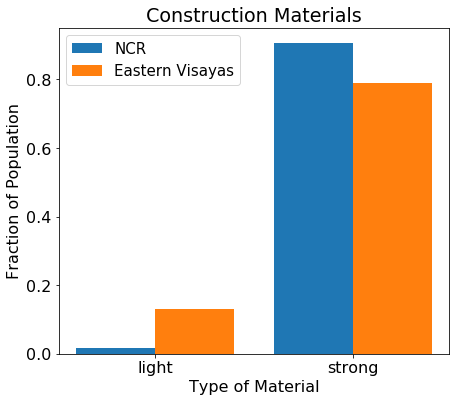

In [33]:
plt.figure(figsize=(7,6))
N = 7

plt.rcParams.update({'font.size': 16})

roof_labels = np.array(['light','strong'])

ind = np.arange(2) 
width = 0.4       
plt.bar(ind, [roof_percent['NCR'][0],roof_percent['NCR'][6]], width, label='NCR')
plt.bar(ind + width, [roof_percent['VIII - Eastern Visayas'][0],roof_percent['VIII - Eastern Visayas'][6]], width,
    label='Eastern Visayas')

plt.ylabel('Fraction of Population')
plt.xlabel('Type of Material')

plt.xticks(ind + width / 2, roof_labels)
plt.legend(loc='best',fontsize=15)
plt.title('Construction Materials')
plt.savefig('/home/jbaldwin/WorldBank/FIGURES/constructionmaterials.png',dpi=400)
plt.show()


In [20]:
# Calculation of vthresh for light buildings (vs) with guess of  that for strong (vl)
Fl = roof_percent['all_phi'][0] # fraction light materials, all Philippines
Fs = roof_percent['all_phi'][6] # fraction strong materials, all Philippines
vm = 85 # average vulnerability m/s
vs = 90 #
Fln = Fl/(Fl + Fs)
Fsn = Fs/(Fl + Fs)
vl = (vm - Fsn*vs)/Fln
print(vl)

47.89645173948818


In [21]:
# Est. Vthresh for vulnerability curve based on building type
# Assume mean vulnerability of country should be 85
def province_vhalf(Fl,Fs):
    
    # Normalize the fractions since not using all building types
    Fln = Fl/(Fl + Fs)
    Fsn = Fs/(Fl + Fs)
    
    Vhalf = [vl, vs] # low, medium, high; numbers estimated from figure 4 uncertainty range and table A2 of Eberenz et al 2020 for reg WP2 (Philippines)
    
    percent_mid = 0.5
    
    Vhalf_est = Vhalf[0]*Fln + Vhalf[1]*Fsn
   
    return Vhalf_est


In [22]:
# Calculate Vthresh for different regions
Vhalf_est = {}
frac_strong = {}
frac_weak = {}
for i in range(len(regions)):
    reg = regions[i]
    frac_strong[reg] = roof_percent[reg][6]
    frac_weak[reg] = roof_percent[reg][0]
    Vhalf_est[reg] = province_vhalf(frac_weak[reg],frac_strong[reg])

In [88]:
pickle.dump( Vhalf_est, open( "Vhalf_est.p", "wb" ) )

In [23]:
Vhalf_est

{'ARMM': 77.1339587414628,
 'CAR': 87.8349724245908,
 'I - Ilocos': 87.89406451529781,
 'II - Cagayan Valley': 87.5336687574861,
 'III - Central Luzon': 88.10004540657263,
 'IVA - CALABARZON': 88.59902333238092,
 'IVB - MIMAROPA': 78.75011215317885,
 'IX - Zamboanga Peninsula': 78.93347982891905,
 'NCR': 89.21692660848132,
 'V - Bicol': 75.49015175963862,
 'VI - Western Visayas': 82.91166145131385,
 'VII - Central Visayas': 85.77374018289805,
 'VIII - Eastern Visayas': 83.97114168486657,
 'X - Northern Mindanao': 84.84837953914112,
 'XI - Davao': 84.36209515620016,
 'XII - SOCCSKSARGEN': 82.14942416259319,
 'XIII - Caraga': 79.63989930083152}